<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#패션 MNIST 데이터셋을 훈련세트와 검증 세트로 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state =42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# fit() 메서드의 결과를 history 변수에 담기
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs =5, verbose =0) #verbose 매개변수 0 은 훈련과정나타내지않는것, 기본값인 1은 에포크마다 진행막대출력

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


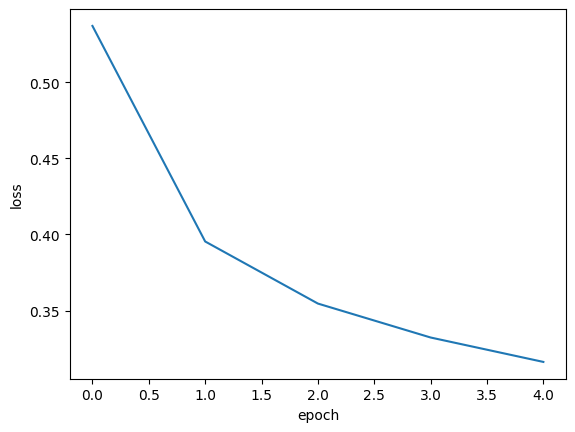

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

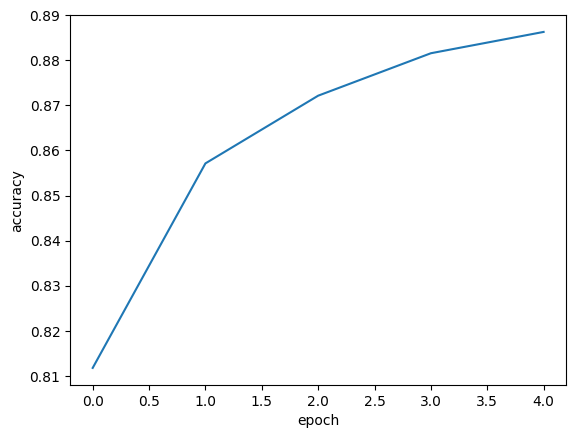

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

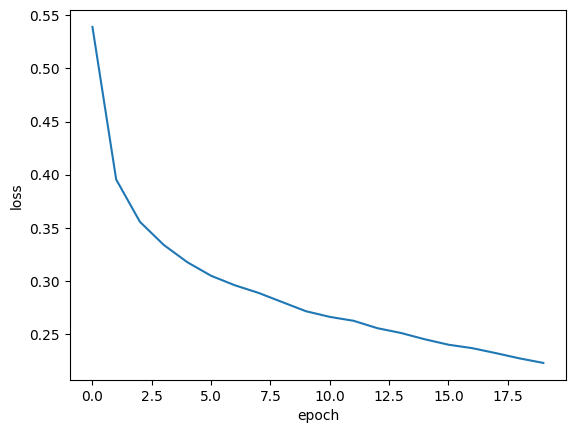

In [8]:
#에포크마다 손실이 감소하고 정확도가 향상하는것으로 모이니 에포크를 늘려 훈련
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs =20, verbose =0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
#에포크마다 검증손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달할 수 있음
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs =20, verbose =0, validation_data = (val_scaled, val_target))

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


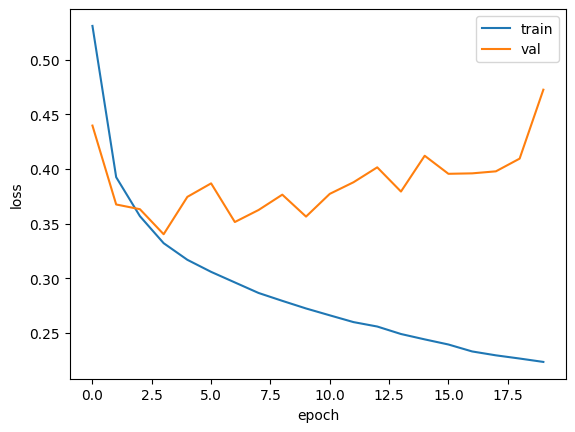

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

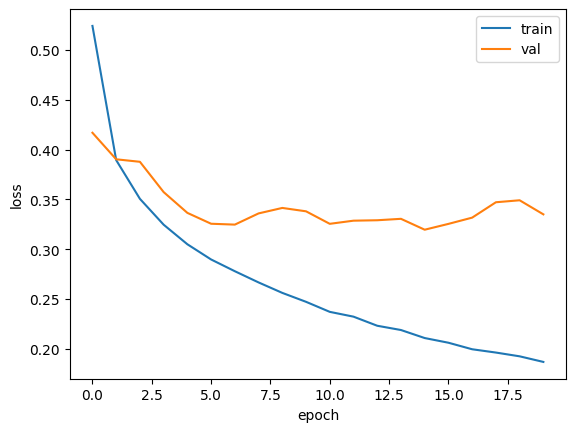

In [12]:
#과대적합을 막기위해 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 확인, 적응적 학습률을 사용하는 Adam 사용
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs =20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [13]:
#keras.layers패키지 아래 Dropout 클래스로 제공, 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만드는 것
model = model_fn(keras.layers.Dropout(0.3)) # 30%정도를 드랍아웃
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


은닉층 뒤에 추가된 Dropout 층은 훈련되는 모델 파라미터가 없음, 입력과 출력의 크기가 같음 + 평가와 예측에 사용할때는 자동으로 드랍아웃을 적용하지않음

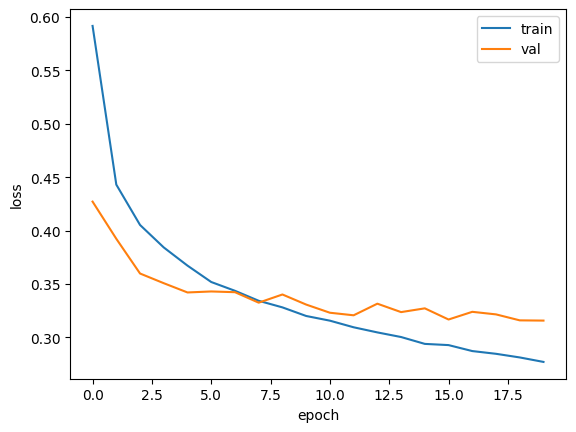

In [16]:
#드랍아웃은 과대적합을 막아줌
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs =20, verbose =0, validation_data =(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [19]:
#에포크 횟수를 10으로 지정하고 모델 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled, val_target))

In [20]:
#케라스모델의 훈련된 모델의 파라미터를 저장하는 save_weights()메서드
model.save_weights('model-weights.h5')

In [22]:
#모델구조와 모델 파라미터를 함께 저장하는 save()메서드
model.save('model-whole.h5') #파일의 확장자가 .h5일경우 HDF5 포멧으로 저장

In [23]:
#파일확인
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Jul 23 12:23 model-weights.h5
-rw-r--r-- 1 root root 981176 Jul 23 12:23 model-whole.h5


In [24]:
#훈련하지않은 새로운모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터읽어 사용해보기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5') #load_weights()메서드를 사용하려면 svae_weights()메서드로 저장했던 모델과 정확히 같은구조를 가져야함

evaluate()메서드는 손실을 계산하기 위해 compile()메서드를 실행해야함, 여기에서는 새로운 데이터에 대해 정확도만 계산하면 되므로 사용안함

In [25]:
#위 모델의 검증 정확도 확인, 케라스의 예측 predict메서드는 샘플마다10개 클래스에대한확률을 반환(패션MNIST가 다중분류이기때문)
#패션MNIST데이터셋에서 덜어낸 검증세트의 샘플개수가12000개이기때문에 predict()메서드는 (12000,10) 크기의 배열반환
#따라서 10개확률중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 계산
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1) #axis = -1은 배열의 마지막 차원을 따라 최댓값을 고름,검증 세트는 2차원 배열이기에 마지막차원은 1,axis=1이면 열을 따라 각행의 최대값의인덱스를선택
print(np.mean(val_labels == val_target)) #인덱스(val_labels)와 타깃(val_target)을 비교 두 배열에서 각 위치의 값이 같으면 1, 다르면 0으로 평균내어 정확도

375/375 [==============================] - 1s 2ms/step
0.8756666666666667


In [26]:
#모델 전체를 파일에서 읽은 다음 검증 세트의 정확도 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8757


[0.33550792932510376, 0.8756666779518127]

In [27]:
#콜백은 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델저장,저장할파일이름을 best-model.h5로 지정하여 콜백적용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs= 20, verbose = 0, validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb])

In [28]:
#모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸 모델이 저장됨, 이모델을 load_model()함수로 다시읽어서 예측
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8838


[0.33157679438591003, 0.8838333487510681]

In [31]:
#직전 모델은 에포크를 20번까지 함, 과대적합이 더 커지기전에 훈련을 중단하는 조기종료사용하기
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) #patience =2 는 2번연속 검증점수가 향상되지 않으면 훈련중지
history = model.fit(train_scaled, train_target, epochs =20, verbose =0, validation_data = (val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

In [32]:
#몇번째에포크에서중지되었는지, 0부터시작하므로 11번째 에포크에서 훈련이 중지됨, patience를 2로 지정했으므로 최상의 모델은 9번째 에포크일것
print(early_stopping_cb.stopped_epoch)

10


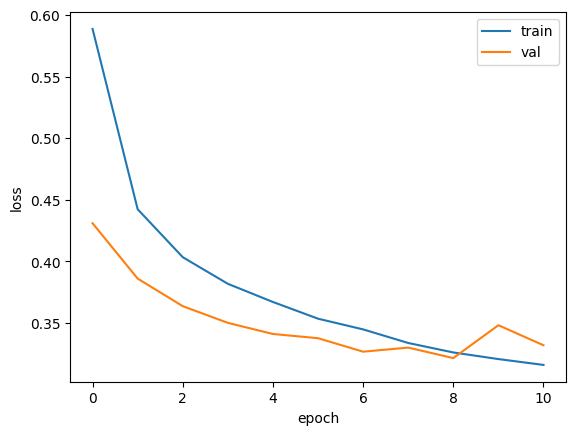

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [35]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3216 - accuracy: 0.8854


[0.32159504294395447, 0.8854166865348816]